<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/TB_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd # UNTUK MEMANIPULASI DATA (MEMBACA DATA CSV)
import numpy as np # UNTUK MANUPULASI DATA (MENGUBAH LIST MENJADI ARRAY)
import missingno as msno #MENGIDENTIFIKASI DATA BERNILAI NULL
import seaborn as sns #MENAMPILKAN GRAFIK
import matplotlib.pyplot as plt #MENAMPILKAN GRAFIK

from sklearn.model_selection import train_test_split # UNTUK MEMISAHKAN ANTARA DATA TEST DAN DATA TRAINING
from sklearn.metrics import classification_report # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS
from sklearn import tree # UNTUK MODEL DECISION TREE

import plotly.express as px  # UNTUK VISUALISASI DATA
import plotly.graph_objects as go # UNTUK VISUALISASI DATA
import graphviz # UNTUK PLOT DESICION TREE

In [103]:
#IMPORT DATASET DAN MENAMPILKAN DATASET
dataset = pd.read_csv('data.csv')
dataset

,no,nama_lengkap,jenis_kelamin,kelurahan,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,1,Budy Hartono Santosa,Laki-laki,Aia Bangih,5570000,8,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
1,2,Eddi Sugiardi,Laki-laki,Aia Bangih,6920000,1,Rusak Berat,Rusak Berat,Rusak Berat,Ya
2,3,Efrem Wardhana,Laki-laki,Aia Bangih,9460000,9,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
3,4,Eko Prasetyo Ang,Laki-laki,Aia Bangih,880000,8,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
4,5,Evan,Laki-laki,Aia Bangih,4770000,12,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
...,...,...,...,...,...,...,...,...,...,...
295,296,Katharina Wihardja,Perempuan,Ujung Gading,3740000,11,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
296,297,Mohamad Noer,Laki-laki,Ujung Gading,2110000,9,Rusak Sedang,Rusak Berat,Rusak Sangat Berat,Tidak
297,298,Mohammad Hidayat Hasan,Laki-laki,Ujung Gading,4190000,4,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
298,299,Wahjudin Judiana Ardiwinata,Laki-laki,Ujung Gading,5020000,12,Rusak Sangat Berat,Rusak Berat,Rusak Sangat Berat,Ya


In [104]:
#MENGHITUNG UKURAN DATASET
dataset.shape

(300, 10)

In [105]:
#MELIHAT INFO DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   no                 300 non-null    int64 
 1   nama_lengkap       300 non-null    object
 2   jenis_kelamin      300 non-null    object
 3   kelurahan          300 non-null    object
 4   penghasilan        300 non-null    int64 
 5   jumlah_penghuni    300 non-null    int64 
 6   kondisi_dinding    300 non-null    object
 7   kondisi_lantai     300 non-null    object
 8   kondisi_atap       300 non-null    object
 9   status_penerimaan  300 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.6+ KB


In [106]:
#MELIHAT DESKRIPSI DATASET NUMERIK
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
no,300.0,1.505000e+02,8.674676e+01,1.0,75.75,150.5,225.25,300.0
penghasilan,300.0,5.234300e+06,2.939495e+06,70000.0,2545000.00,5340000.0,7815000.00,9920000.0
jumlah_penghuni,300.0,6.446667e+00,3.494930e+00,1.0,4.00,6.0,9.00,12.0


In [107]:
#MELIHAT DESKRIPSI DATASET NON NUMERIK
dataset.describe(exclude=['float64','int64']).T

,count,unique,top,freq
nama_lengkap,300,299,Mohamad Noer,2
jenis_kelamin,300,2,Laki-laki,225
kelurahan,300,19,Aua Kuniang,21
kondisi_dinding,300,5,Rusak Sedang,66
kondisi_lantai,300,3,Rusak Berat,177
kondisi_atap,300,5,Rusak Sangat Berat,69
status_penerimaan,300,2,Tidak,200


Total Jumlah Data Pengamatan: 300


no                   0
nama_lengkap         0
jenis_kelamin        0
kelurahan            0
penghasilan          0
jumlah_penghuni      0
kondisi_dinding      0
kondisi_lantai       0
kondisi_atap         0
status_penerimaan    0
dtype: int64

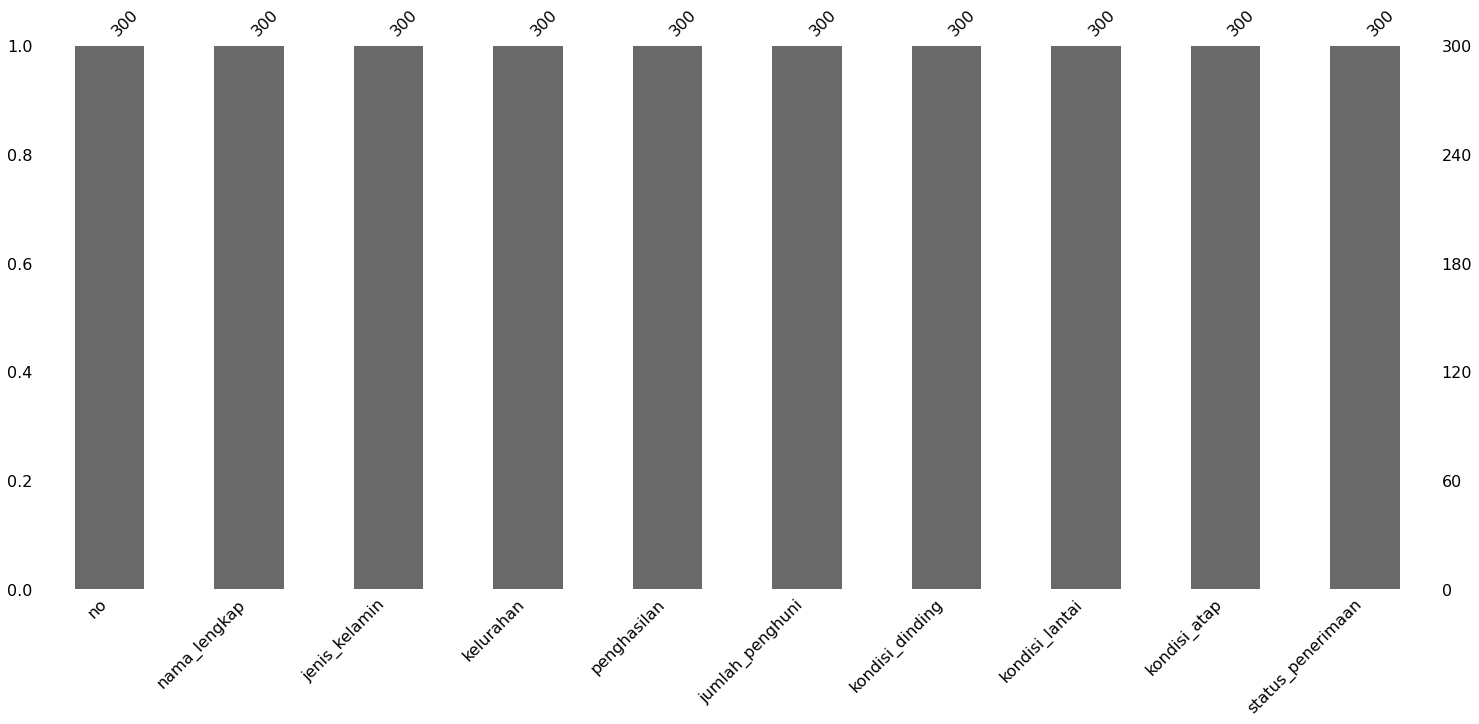

In [108]:
#PENGECEKAN NILAI NULL
print ('Total Jumlah Data Pengamatan:', dataset.shape[0])
msno.bar(dataset)
dataset.isnull().sum()

In [109]:
#MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN UNTUK ANALISIS
predata_hasil = dataset.drop(["no", "nama_lengkap", "jenis_kelamin", "kelurahan"], axis=1)

#MENAMPILKAN NAMA KOLOM YANG DIPERLUKAN
predata_hasil.columns

Index(['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_lantai',
       'kondisi_atap', 'status_penerimaan'],
      dtype='object')

In [110]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA STATUS PENERIMAAN
def status_penerimaan(value1):
  if value1 == "Ya":
    return 1
  elif value1 == "Tidak":
    return 0

predata_hasil['status_penerimaan'] = predata_hasil['status_penerimaan'].apply(status_penerimaan)
display(predata_hasil['status_penerimaan'])

0      0
1      1
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: status_penerimaan, Length: 300, dtype: int64

In [111]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA PENGHASILAN
def penghasilan(value1):
  if value1 >= 0 and value1 <= 1000000:
    return 1
  elif value1 > 1000000 and value1 <= 2000000:
    return 2
  elif value1 > 2000000 and value1 <= 3000000:
    return 3
  elif value1 > 3000000 and value1 <= 4000000:
    return 4
  elif value1 > 4000000:
    return 5

predata_hasil['penghasilan'] = predata_hasil['penghasilan'].apply(penghasilan)
display(predata_hasil['penghasilan'])

0      5
1      5
2      5
3      1
4      5
      ..
295    4
296    3
297    5
298    5
299    5
Name: penghasilan, Length: 300, dtype: int64

In [112]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA JUMLAH PENGHUNI
def jumlah_penghuni(value1):
  if value1 == 1:
    return 5
  elif value1 > 1  and value1 <= 3:
    return 4
  elif value1 > 3 and value1 <= 5:
    return 3
  elif value1 > 5 and value1 <= 7:
    return 2
  elif value1 >= 8:
    return 1

predata_hasil['jumlah_penghuni'] = predata_hasil['jumlah_penghuni'].apply(jumlah_penghuni)
display(predata_hasil['jumlah_penghuni'])

0      1
1      5
2      1
3      1
4      1
      ..
295    1
296    1
297    3
298    1
299    5
Name: jumlah_penghuni, Length: 300, dtype: int64

In [113]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI ATAP DAN KONDISI DINDING
def kondisi_atap_dinding(value1):
  if value1 == "Rusak Sangat Berat":
    return 5
  elif value1 == "Rusak Berat":
    return 4
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 2
  elif value1 == "Rusak Sangat Ringan":
    return 1

predata_hasil['kondisi_atap'] = predata_hasil['kondisi_atap'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_atap'])

predata_hasil['kondisi_dinding'] = predata_hasil['kondisi_dinding'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_dinding'])

0      1
1      4
2      5
3      5
4      1
      ..
295    1
296    5
297    1
298    5
299    4
Name: kondisi_atap, Length: 300, dtype: int64

0      3
1      4
2      2
3      2
4      1
      ..
295    1
296    3
297    3
298    5
299    2
Name: kondisi_dinding, Length: 300, dtype: int64

In [114]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI LANTAI
def kondisi_lantai(value1):
  if value1 == "Rusak Berat":
    return 5
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 1

predata_hasil['kondisi_lantai'] = predata_hasil['kondisi_lantai'].apply(kondisi_lantai)
display(predata_hasil['kondisi_lantai'])

0      5
1      5
2      3
3      3
4      1
      ..
295    1
296    5
297    5
298    5
299    3
Name: kondisi_lantai, Length: 300, dtype: int64

In [115]:
#TAMPILAN DATASET SETELAH KONVERSI
predata_hasil

,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,5,1,3,5,1,0
1,5,5,4,5,4,1
2,5,1,2,3,5,0
3,1,1,2,3,5,0
4,5,1,1,1,1,0
...,...,...,...,...,...,...
295,4,1,1,1,1,0
296,3,1,3,5,5,0
297,5,3,3,5,1,0
298,5,1,5,5,5,1


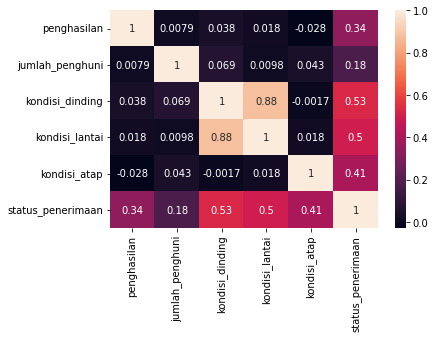

In [116]:
#KORELASI ANTAR VARIABEL
sns.heatmap(predata_hasil.corr(), annot=True)

In [117]:
#MENENTUKAN VARIABEL DEPENDEN DAN INDEPENDEN
x = predata_hasil[['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_atap', 'kondisi_lantai']]
y = predata_hasil['status_penerimaan']
print(x)
print(y)

     penghasilan  jumlah_penghuni  kondisi_dinding  kondisi_atap  \
0              5                1                3             1   
1              5                5                4             4   
2              5                1                2             5   
3              1                1                2             5   
4              5                1                1             1   
..           ...              ...              ...           ...   
295            4                1                1             1   
296            3                1                3             5   
297            5                3                3             1   
298            5                1                5             5   
299            5                5                2             4   

     kondisi_lantai  
0                 5  
1                 5  
2                 3  
3                 3  
4                 1  
..              ...  
295               1  
296    

In [118]:
# FUNGSI MENJALANKAN ALGORITMA
def fitting(x, y, criterion, splitter, mdepth, clweight, minleaf):

    # MEMBAGI DATASET MENJADI DATA TES DAN DATA TRAINING DENGAN PERBANDINGAN 20%:80%
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    #FEATURES SCALLING
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # MEMBUAT OBJEK DESICION TREE CLASSIFIER
    model = tree.DecisionTreeClassifier(criterion=criterion, 
                                        splitter=splitter, 
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf, 
                                        random_state=1, 
                                  )
    # MELAKUKAN TRAINING DATA DENGAN MENGGUNAKAN MODEL DESICION TREE CLASSIFIER
    clf = model.fit(x_train, y_train)

    # MELAKUKAN PREDIKSI PADA DATA TRAINING
    pred_labels_tr = model.predict(x_train)
    # MELAKUKAN PREDIKSI PADA DATA TEST
    pred_labels_te = model.predict(x_test)

    # MENAMPILKAN RINGKASAN DARI ALGORITMA DAN HASIL EVALUASI MODEL
    print('*************** Tree Summary ***************')
    print('Kelas: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('Number of leaves: ', clf.tree_.n_leaves)
    print('Number of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Test Data ***************')
    # MENAMPILKAN SKOR DATA TES
    score_te = model.score(x_test, y_test)
    print('Accuracy Score: ', score_te)
    # MENAMPILKAN LAPORAN KLASIFIKASI UNTUK EVALUASI MODEL
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")
    
    print('*************** Evaluation on Training Data ***************')
    # MENAMPILKAN SKOR DATA TRAINING
    score_tr = model.score(x_train, y_train)
    print('Accuracy Score: ', score_tr)
    # MENAMPILKAN LAPORAN KLASIFIKASI UNTUK EVALUASI MODEL
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # MEMNGGUNKAN FUNGSI GRAPHVIZ UNTUK MELAKUKAN PLOT
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True,
                                rotate=True
                               ) 
    graph = graphviz.Source(dot_data)
    
    # MENGEMBALIKAN NILAI DATA YANG RELEVAN UNTUK NEMPILKAN DIAGRAM PLOT
    return x_train, x_test, y_train, y_test, clf, graph

In [119]:
# MENJALANKAN FUNGSI FITTING
# PARAMETER 1 YAITU DATA VARIABEL INDEPENDEN
# PARAMETER 2 YAITU DATA VARIABEL DEPENDEN
# PARAMETER 3 YAITU KRITERION DATA (GINI)
# PARAMETER 4 YAITU SPLITTER 
# PARAMETER 5 YAITU MAX DEPTH
# PARAMETER 6 YAITU CLWEIGHT
# PARAMATER 7 YAITU MIN LEAF
x_train, x_test, y_train, y_test, clf, graph = fitting(x, y, 'gini', 'best', mdepth=None, clweight=None, minleaf=1000)

#MENAMPILKAN HASIL VISUALISASI
graph

*************** Tree Summary ***************
Kelas:  [0 1]
Tree Depth:  0
Number of leaves:  1
Number of features:  5
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.6166666666666667
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        37
           1       0.00      0.00      0.00        23

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.6791666666666667
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       163
           1       0.00      0.00      0.00        77

    accuracy                           0.68       240
   macro avg       0.34      0.50

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

ValueError: ignored